In [66]:
import pandas as pd
import numpy as np
import datetime 
import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.listdir("data/")

['inpatientCharges.zip',
 'Inpatient_prospective_payment.zip',
 'purchase_credit_card.zip',
 'res_purchase_card.zip',
 'S&P Benchmark.zip',
 'Twillio_data.zip',
 'us_regions.zip',
 'Variables_Dictionary_2019.zip',
 'XYZloan_default_adj.zip',
 'XYZloan_default_selected_vars.zip']

In [5]:
dat = pd.read_csv("data/inpatientCharges.zip")
region = pd.read_csv("data/us_regions.zip")

In [6]:
dat.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [7]:
region.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


Merge the two data!

In [8]:
data = pd.merge(dat, region, left_on='Provider State', right_on='State Code', how= 'left')
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,State Code,Region,Division
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73,Alabama,AL,South,East South Central
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71,Alabama,AL,South,East South Central
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79,Alabama,AL,South,East South Central
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16,Alabama,AL,South,East South Central
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44,Alabama,AL,South,East South Central


In [10]:
data.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
State                                   0
State Code                              0
Region                                  0
Division                                0
dtype: int64

seems like there is white space in column names? let's clean !

In [12]:
data = data.rename(columns=lambda x: x.strip())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 16 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
Total Discharges                        163065 non-null int64
Average Covered Charges                 163065 non-null object
Average Total Payments                  163065 non-null object
Average Medicare Payments               163065 non-null object
State                                   163065 non-null object
State Code                              163065 non-null object
Region    

Avg covered, totla, medicare should be int but due to "$" it is imported as str.

In [27]:
# converting to numeric
cols = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for c in cols:
    data[c] = pd.to_numeric(data[c].str.strip("$"))
    

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 16 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
Total Discharges                        163065 non-null int64
Average Covered Charges                 163065 non-null float64
Average Total Payments                  163065 non-null float64
Average Medicare Payments               163065 non-null float64
State                                   163065 non-null object
State Code                              163065 non-null object
Region 

#### EDA

In [39]:
cols = ['Provider Id', 'Provider Name', 'Provider City']
uniq = []
cols[i]
for i in range(0,len(cols)): 
    uniq.append(len(set(data[cols[i]])))
    print("there are %d number of unique %s in the data" %(uniq[i], cols[i]))

there are 3337 number of unique Provider Id in the data
there are 3201 number of unique Provider Name in the data
there are 1977 number of unique Provider City in the data


In [79]:
def pivot_tab(val, index, topN = None):
    if topN != None:
        tab = pd.pivot_table(data, values = [val], index = [index], aggfunc = np.mean).sort_values(by = val, ascending = False)[:topN]
    else: 
        tab = pd.pivot_table(data, values = [val], index = [index], aggfunc = np.mean).sort_values(by = val, ascending = False)
    return(tab)

In [59]:
pivot_tab(val = 'Average Covered Charges', index = 'Provider Name', topN= 5)

,Average Covered Charges
Provider Name,
UVA HEALTH SCIENCES CENTER,211922.000000
BAYONNE HOSPITAL CENTER,147441.334000
DOCTORS MEDICAL CENTER,144695.833286
STANFORD HOSPITAL,138818.649770
NORTHBAY MEDICAL CENTER,138504.546230


In [60]:
pivot_tab(val='Average Covered Charges', index= 'Provider City', topN= 5)

,Average Covered Charges
Provider City,
BAYONNE,147441.334000
STANFORD,138818.649770
DALY CITY,130177.362615
VACAVILLE,122472.350000
WALNUT CREEK,113621.525055


In [61]:
pivot_tab(val= 'Average Covered Charges', index= 'State',topN=5)

,Average Covered Charges
State,
California,67508.616536
New Jersey,66125.686274
Nevada,61047.115416
Florida,46016.233587
Texas,41480.193404


Corr btw region and numerical variables:

Wall time: 9.21 s


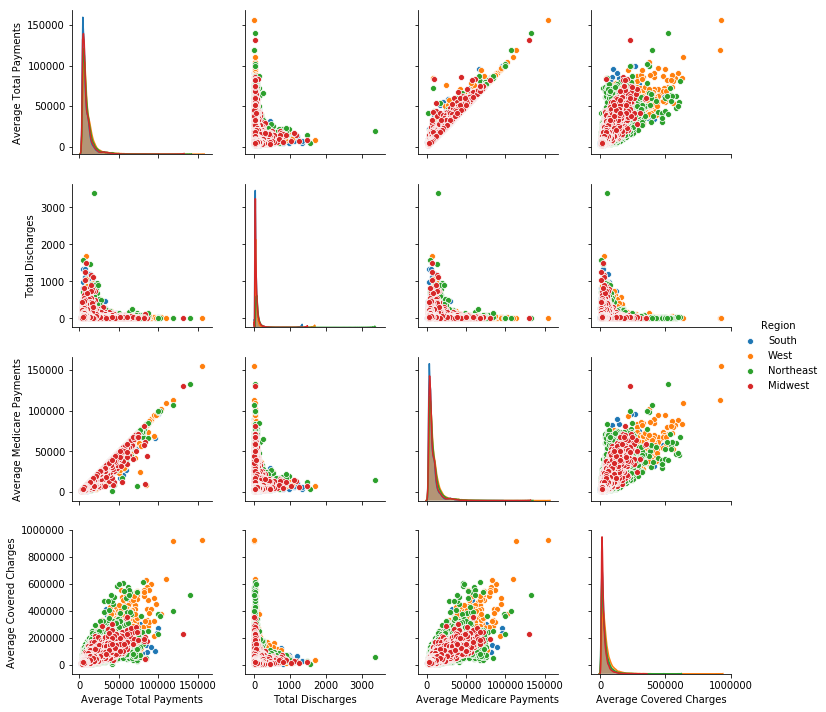

In [63]:
%%time
sns.pairplot(data[['Region','Average Total Payments','Total Discharges','Average Medicare Payments','Average Covered Charges']], 
             hue= 'Region')

In [64]:
def CorrMtx(df, size, dropDuplicates = True):
    df = df.corr()

    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    sns.set_style(style = 'white')

    f, ax = plt.subplots(figsize=(size[0], size[1]))

    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

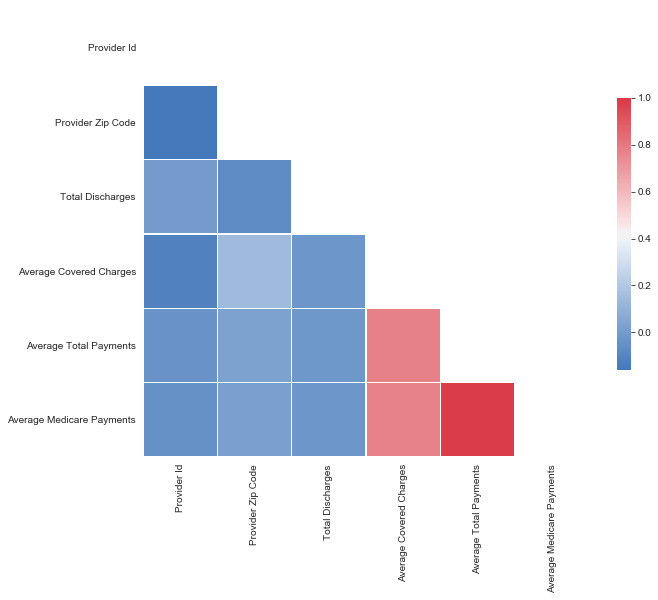

In [68]:
CorrMtx(data, [10,10])

Total payment is correlated with average charges and medicare payment. There's also a relationship between medicare payment and medicare coverage. However cost has very little to do with the number of patients seen.

Geo-data:

In [70]:
# uniq states numb
len(set(data['Provider State']))

51

<Figure size 1080x576 with 0 Axes>

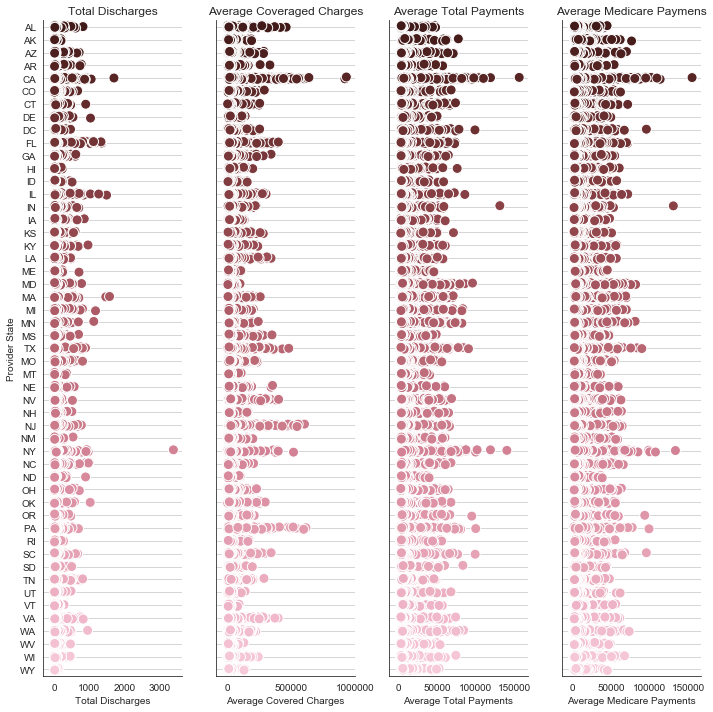

In [69]:
fig = plt.figure(figsize = (15,8))

pp = sns.PairGrid(data= data, 
                  x_vars=['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments'],
                  y_vars=['Provider State'],
                  height = 10, 
                  aspect = 0.25                  
                 )
pp.map(sns.stripplot, 
       size = 10, 
       orient = 'h',
       palette = 'ch:s=1, r = -0.1, h = 1_r', 
       linewidth = 1, 
       edgecolor = 'w'
      )

pp.set(xlabel="Amount ($)", ylabel="")

titles = ["Total Discharges", "Average Coveraged Charges", "Average Total Payments",
          "Average Medicare Paymens"]

for ax, title in zip(pp.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

By region instead of states: 

<Figure size 1080x576 with 0 Axes>

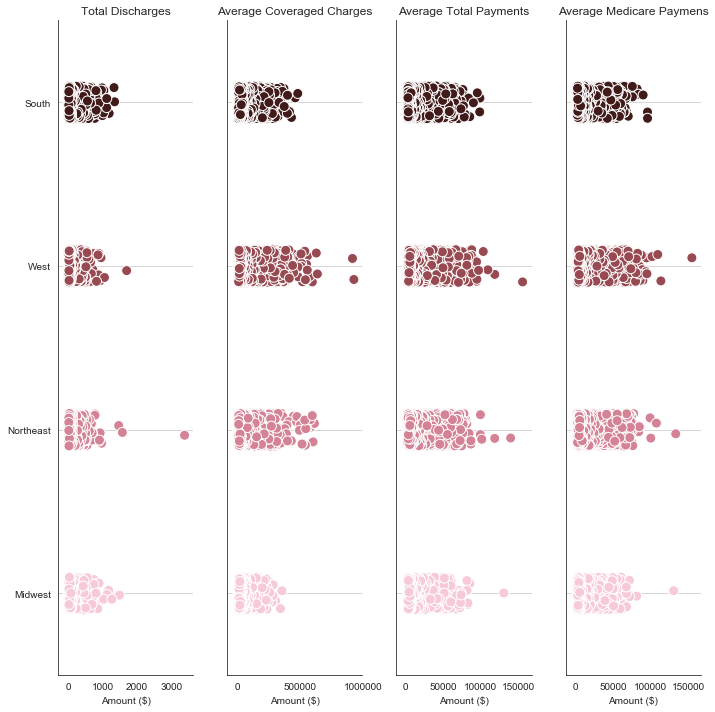

In [73]:
fig = plt.figure(figsize = (15,8))

pp = sns.PairGrid(data= data, 
                  x_vars=['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments'],
                  y_vars=['Region'],
                  height = 10, 
                  aspect = 0.25                  
                 )
pp.map(sns.stripplot, 
       size = 10, 
       orient = 'h',
       palette = 'ch:s=1, r = -0.1, h = 1_r', 
       linewidth = 1, 
       edgecolor = 'w'
      )

pp.set(xlabel="Amount ($)", ylabel="")

titles = ["Total Discharges", "Average Coveraged Charges", "Average Total Payments",
          "Average Medicare Paymens"]

for ax, title in zip(pp.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

Percentage of payment coverage:

In [74]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'State', 'State Code', 'Region',
       'Division'],
      dtype='object')

In [76]:
data['payment coverage'] = data['Average Total Payments'] / data['Average Covered Charges']  

In [82]:
data['payment coverage'].mean()

0.33488932586159775

In [80]:
# avg payment coverage by region:
pivot_tab(val='payment coverage', index= 'Region', topN = None)

,payment coverage
Region,
Northeast,0.371708
Midwest,0.349883
South,0.336497
West,0.267244


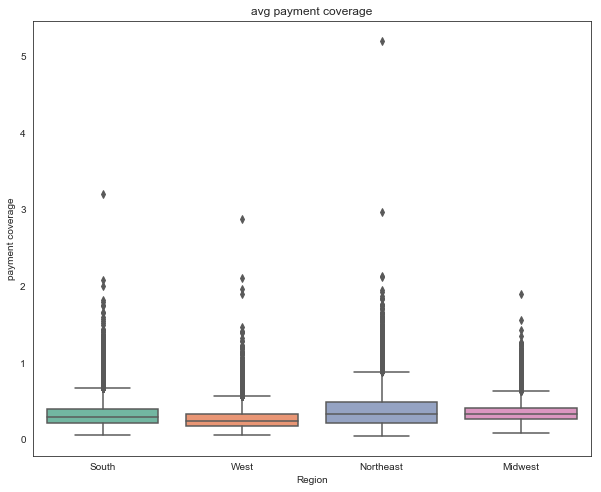

In [93]:
fig = plt.figure(figsize = (10,8))

sns.boxplot(data=data, x='Region', y= 'payment coverage', palette='Set2').set(xlabel = 'Region', title = 'avg payment coverage')
plt.show()

In [81]:
pivot_tab(val = 'payment coverage', index= 'Provider State')

,payment coverage
Provider State,
MD,0.943075
VT,0.601480
MA,0.562779
ND,0.498038
WV,0.450028
ME,0.439409
NY,0.438283
MT,0.437750
MI,0.433487


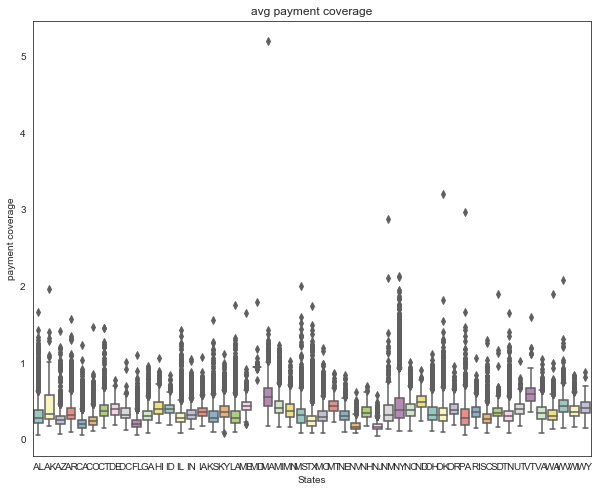

In [94]:
fig = plt.figure(figsize = (10,8))

sns.boxplot(data=data, x='Provider State', y= 'payment coverage', palette='Set3').set(xlabel = 'States', title = 'avg payment coverage')
plt.show()


Patient avg by state

States have differents norms and rules. This features allows us to capture the normal state of each. Result can also be used to compare against the mean.

In [97]:
pat_avg_state = data.groupby('Provider State').mean()[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']]
pat_avg_state.corr()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Total Discharges,1.000000,-0.062243,-0.124043,-0.060745
Average Covered Charges,-0.062243,1.000000,0.253107,0.250595
Average Total Payments,-0.124043,0.253107,1.000000,0.991735
Average Medicare Payments,-0.060745,0.250595,0.991735,1.000000


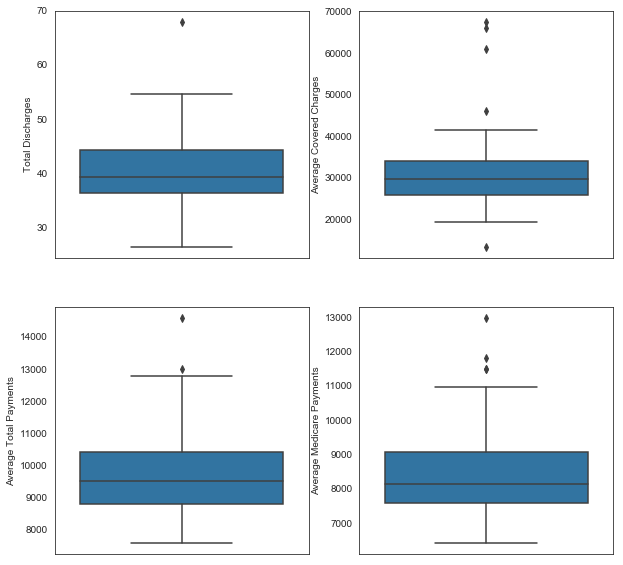

In [116]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10,10)

sns.boxplot(pat_avg_state['Total Discharges'], orient = 'v',ax= axes[0][0])
sns.boxplot(pat_avg_state['Average Covered Charges'],orient= 'v',ax= axes[0][1])
sns.boxplot(pat_avg_state['Average Total Payments'],orient= 'v', ax= axes[1][0])
sns.boxplot(pat_avg_state['Average Medicare Payments'],orient= 'v', ax= axes[1][1])


In [117]:
pat_avg_state.sort_values(by = 'Total Discharges', ascending= False)

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider State,,,,
DE,67.901015,27071.699645,10360.072411,8959.673274
MI,54.539952,24124.247210,9754.420406,8662.157756
NJ,52.052839,66125.686274,10678.988647,9586.940056
MD,51.955255,13377.803790,12608.947664,11480.121829
NC,51.043841,25140.952162,9089.435711,7998.649702
MA,50.411244,20534.006713,10279.981536,9241.719323
FL,48.127208,46016.233587,8826.990436,7667.478695
CT,47.865738,31318.410114,11365.450671,10104.592944
NY,47.456635,31435.685543,11795.492052,10620.736398


Numb of uniq procedures (DRG):

In [128]:
 print('The unique number of procedure {}.'.format(len(data['DRG Definition'].unique())))

The unique number of procedure 100.


In [144]:
data.groupby(['Provider State', 'DRG Definition']).agg({'DRG Definition': 'count'})

DRG Definition
Provider State DRG Definition                                                    
AK             039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                         1
               057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O...               1
               064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...               2
               065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...               6
               066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR...               4
               069 - TRANSIENT ISCHEMIA                                         2
               101 - SEIZURES W/O MCC                                           2
               176 - PULMONARY EMBOLISM W/O MCC                                 1
               177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC               2
               178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC                3
               189 - PULMONARY EDEMA & RESPIRATORY FAILURE                      3
               190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                7
               191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC                 6
               192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O...               6
               193 - SIMPLE PNEUMONIA & PLEURISY W MCC                          6
               194 - SIMPLE PNEUMONIA & PLEURISY W CC                           8
               195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC                     6
               207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR...               2
               208 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR...               3
               238 - MAJOR CARDIOVASC PROCEDURES W/O MCC                        2
               243 - PERMANENT CARDIAC PACEMAKER IMPLANT W CC                   1
               244 - PERMANENT CARDIAC PACEMAKER IMPLANT W/O C...               1
               246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT...               1
               247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT...               4
               251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY ...               1
               252 - OTHER VASCULAR PROCEDURES W MCC                            1
               253 - OTHER VASCULAR PROCEDURES W CC                             1
               280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED A...               1
               281 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED A...               1
               282 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED A...               1
...                                                                           ...
WY             419 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. W...               1
               439 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W CC               2
               460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                      4
               470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT O...              11
               473 - CERVICAL SPINAL FUSION W/O CC/MCC                          3
               480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT...               1
               481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT...               3
               482 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT...               2
               491 - BACK & NECK PROC EXC SPINAL FUSION W/O CC...               3
               536 - FRACTURES OF HIP & PELVIS W/O MCC                          1
               552 - MEDICAL BACK PROBLEMS W/O MCC                              4
               563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, ...               1
               602 - CELLULITIS W MCC                                           1
               603 - CELLULITIS W/O MCC                                         4
               638 - DIABETES W CC                                              2
               640 - MISC DISORDERS OF NUTRITION,METABOLISM,FL...               2
               641 - MISC DISORDERS OF NUTRITION,

In [176]:
# uniq drg by state: 
tab = data['DRG Definition'].groupby(data['Provider State']).nunique().reset_index().sort_values(by = 'DRG Definition')
tab

,Provider State,DRG Definition
0,AK,78
50,WY,87
11,HI,88
26,MT,93
46,VT,94
13,ID,95
28,ND,95
44,UT,98
30,NH,99
21,ME,99


In [175]:
# States with less than 100 uniq procedures:
tab[tab['DRG Definition'] != 100]

,Provider State,DRG Definition
0,AK,78
50,WY,87
11,HI,88
26,MT,93
46,VT,94
13,ID,95
28,ND,95
44,UT,98
30,NH,99
21,ME,99


In [268]:
#ak_uni = list(data[data['Provider State'] == 'AK']['DRG Definition'].unique())
#uni_pro = data['DRG Definition'].unique()

#for i in uni_pro:
#   if i not in ak_uni:
#        print(i)

074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC
149 - DYSEQUILIBRIUM
202 - BRONCHITIS & ASTHMA W CC/MCC
203 - BRONCHITIS & ASTHMA W/O CC/MCC
254 - OTHER VASCULAR PROCEDURES W/O CC/MCC
249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT W/O MCC
301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC
305 - HYPERTENSION W/O MCC
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC
372 - MAJOR GASTROINTESTINAL DISORDERS & PERITONEAL INFECTIONS W CC
390 - G.I. OBSTRUCTION W/O CC/MCC
391 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W MCC
439 - DISORDERS OF PANCREAS EXCEPT MALIGNANCY W CC
469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W MCC
480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W MCC
536 - FRACTURES OF HIP & PELVIS W/O MCC
563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, PELVIS & THIGH W/O MCC
602 - CELLULITIS W MCC
684 - RENAL FAILURE W/O CC/MCC
698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W MCC
699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC
917 - POISONING & TOXIC EFFECTS

In [256]:
#lack_states = list(tab[tab['DRG Definition'] != 100]['Provider State'])
#data[data['Provider State'].apply(lambda x:x not in lack_states)]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,State,State Code,Region,Division,payment coverage
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,Alabama,AL,South,East South Central,0.175264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,Alabama,AL,South,East South Central,0.382476
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,Alabama,AL,South,East South Central,0.144699
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,Alabama,AL,South,East South Central,0.387016
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,Alabama,AL,South,East South Central,0.178873
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,Alabama,AL,South,East South Central,0.393232
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41,Alabama,AL,South,East South Central,0.487157
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50,Alabama,AL,South,East South Central,0.224076
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40,Alabama,AL,South,East South Central,0.214329
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94,Alabama,AL,South,East South Central,0.073651


In [272]:
data['Provider Name'].groupby(data['Provider State']).nunique().reset_index().sort_values(by = 'Provider Name', ascending = False)

,Provider State,Provider Name
43,TX,308
4,CA,295
9,FL,166
34,NY,161
38,PA,151
35,OH,131
14,IL,126
10,GA,106
42,TN,97
1,AL,93


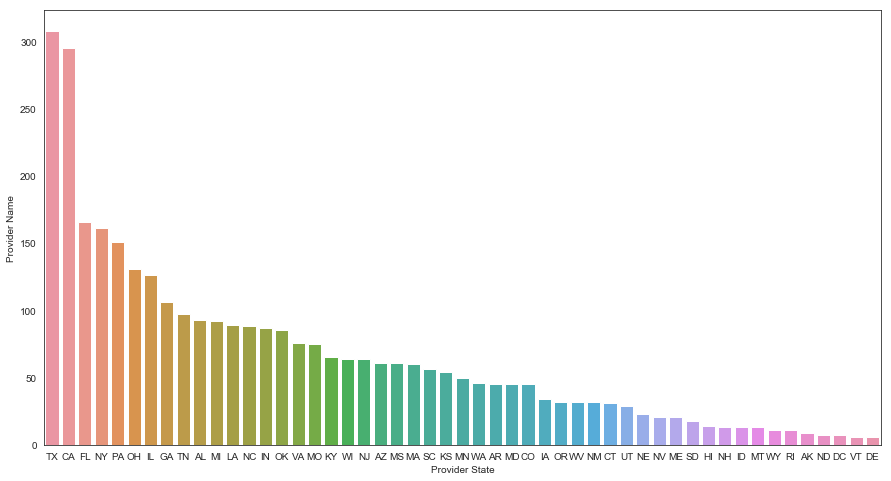

In [274]:
tab = data['Provider Name'].groupby(data['Provider State']).nunique().reset_index().sort_values(by = 'Provider Name', ascending = False)

fig = plt.figure(figsize = (15,8))
sns.barplot(data=tab, x= 'Provider State', y= 'Provider Name')


Medicare Paid %
Medicare % paid varies by states, hospitals, and procedure. This feature will allow us to determing which hospitals, treatment and procedures are viewed favorably by medicare.

In [278]:
data['Medicare %'] = data['Average Medicare Payments'] / data['Average Total Payments']
data['Medicare %'].mean()

0.8465447820733937

In [282]:
#data.groupby('Provider State').mean()['Medicare %']
tab = data.groupby('Provider State').agg({'Medicare %': 'mean'})
tab

,Medicare %
Provider State,
AK,0.871982
AL,0.816622
AR,0.834876
AZ,0.842718
CA,0.885084
CO,0.832478
CT,0.865581
DC,0.884320
DE,0.837981


Text(0.5, 1.0, 'Medicare % Paid Distribution')

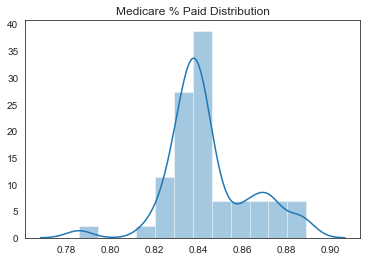

In [284]:
sns.distplot(tab)
plt.title("Medicare % Paid Distribution")

Ouf of pocket payment:

Out of pocket highlight procedures that are most expensive. The hypothesis is that the procedures with the highest out of pocket cost are the least likely to be a target for fraud.

In [292]:
data['oop pay'] = data['Average Total Payments'] - data['Average Medicare Payments']
data['oop pay'].mean()

1212.9828401557875

In [295]:
tab = data.groupby('DRG Definition').agg({'oop pay': 'mean'})
tab[tab['oop pay'] > data['oop pay'].mean()].sort_values(by = 'oop pay', ascending = False)

,oop pay
DRG Definition,
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,3735.070150
473 - CERVICAL SPINAL FUSION W/O CC/MCC,2594.714232
247 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W/O MCC,2582.521719
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,2559.372528
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,2497.221490
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,2360.052535
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,2307.339390
246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS,2273.484089
238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,2273.473027
